In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/YOLO')

In [3]:
#!pip freeze

In [4]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install chainer
#!pip install cupy-cuda80

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [5]:
!pip install chainercv

     |████████████████████████████████| 266kB 4.9MB/s 
  Created wheel for chainercv: filename=chainercv-0.13.1-cp36-cp36m-linux_x86_64.whl size=537354 sha256=708800a78a743def956ff122b9c09f42d2b233181c3cc492bb60e035ed82b96e
  Stored in directory: /root/.cache/pip/wheels/ea/10/01/e221beaa4b3d8341aa819a39ab8d4677457c79c81f521f3a94
Successfully built chainercv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving sample01.jpg to sample01.jpg


From: https://chainercv-models.preferred.jp/yolo_v3_voc0712_converted_2018_05_01.npz
To: /root/.chainer/dataset/_dl_cache/79d417010adfc0e1052bb8e5c4851753
  %   Total    Recv       Speed  Time left
100  219MiB  219MiB   6971KiB/s    0:00:00

/usr/local/lib/python3.6/dist-packages/chainercv/utils/link.py:72: RuntimeWarning: Although the pretrained model is trained using cv2 as the backend of resize function, the current setting does not use cv2 as the backend of resize function. The performance may change due to using different backends. To suppress this warning, set `chainer.config.cv_resize_backend = "cv2".
  RuntimeWarning)


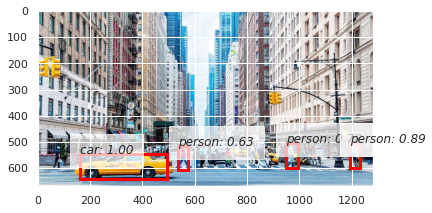

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import chainer
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import YOLOv2
from chainercv.links import YOLOv3
from chainercv import utils
from chainercv.visualizations import vis_bbox


model = YOLOv3(
    n_fg_class=len(voc_bbox_label_names),
    pretrained_model = 'voc0712')
    
gpu = 0 # GPU >=0, CPU = -1
chainer.cuda.get_device_from_id(gpu).use()
model.to_gpu()
    
image = 'sample01.jpg'
img = utils.read_image(image, color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

vis_bbox(
    img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()